https://mp.weixin.qq.com/s?__biz=MzI0OTQyNzEzMQ==&mid=2247488011&idx=2&sn=a6cdc738adf1ec48d2d4bcd24a4dd2d0&chksm=e990f7dfdee77ec9dddb0baea62fc03488c66ee975909698c776eac8991a758d5a7c0f8574b6&mpshare=1&scene=1&srcid=1220CtzPe0JvT99ZLAGXfxl4#rd

In [2]:
import pandas as pd
from feature_selector import FeatureSelector

In [4]:
data = pd.read_csv('05/anti_fraud_data.csv', index_col=0)
data.head()

,is_email_acct,certificationtype,registered_channels,sex,age,registered_days,area1_danger,area4_danger,is_area3_eqaul_area4,is_area3_equal_area6,...,10m_pay_times,12h_pay_times,1d_pay_times,1h_pay_times,30m_pay_times,10m_Sum_pay_amount,12h_Sum_pay_amount,1d_Sum_pay_amount,1h_Sum_pay_amount,flag
ID,,,,,,,,,,,,,,,,,,,,,
0,0.0,2,SDK,1.0,42,219,5.0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
1,NaN,4,NaN,NaN,0,0,5.0,5,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
2,0.0,3,PC,1.0,27,620,5.0,1,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
3,0.0,2,NaN,2.0,41,1188,5.0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
4,NaN,4,NaN,NaN,0,0,5.0,5,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0


In [5]:
train_labels = data.iloc[:, -1]
train_features = data.drop(columns='flag')

In [21]:
train_features.shape

(46978, 94)

In [7]:
fs = FeatureSelector(data=train_features, labels=train_labels)

### 特征选取方法   
(1) identify_missing

该方法用于选择missing value 百分比大于指定值(通过missing_threshold指定百分比)的feature。该方法能应用于监督学习和非监督学习的特征选择。

In [8]:
# 选择出missing value 百分比大于60%的特征
fs.identify_missing(missing_threshold=0.6)

22 features with greater than 0.60 missing values.



In [9]:
# 查看选择出的特征
fs.ops['missing']

['ip_desc_danger',
 '12h_sign_bank_cnt',
 '1h_release_bank_cnt',
 '24h_release_bank_cnt',
 '12h_release_bank_cnt',
 '30m_Sum_pay_amount',
 '15d_Max_pay_amount',
 '7d_Max_pay_amount',
 '15d_Min_pay_amount',
 '7d_Min_pay_amount',
 '15d_pay_times',
 '7d_pay_times',
 '15d_Sum_pay_amount',
 '7d_Sum_pay_amount',
 '10m_pay_times',
 '12h_pay_times',
 '1d_pay_times',
 '1h_pay_times',
 '30m_pay_times',
 '10m_Sum_pay_amount',
 '12h_Sum_pay_amount',
 '1h_Sum_pay_amount']

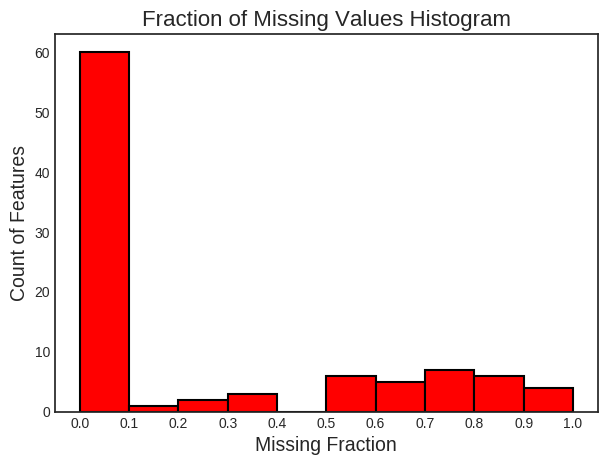

In [10]:
# 绘制所有特征missing value百分比的直方图
fs.plot_missing()

### (2) identify_collinear

该方法用于选择相关性大于指定值(通过correlation_threshold指定值)的feature。该方法同样适用于监督学习和非监督学习。

In [11]:
# 不对feature进行one-hot encoding（默认为False）, 然后选择出相关性大于98%的feature, 
fs.identify_collinear(correlation_threshold=0.98, one_hot=False)

7 features with a correlation magnitude greater than 0.98.



In [12]:
# 查看选择的feature
fs.ops['collinear']

['12h_release_bank_cnt',
 '30d_Max_pay_amount',
 '60d_Max_pay_amount',
 '90d_Max_pay_amount',
 '60d_pay_times',
 '90d_pay_times',
 '90d_Sum_pay_amount']

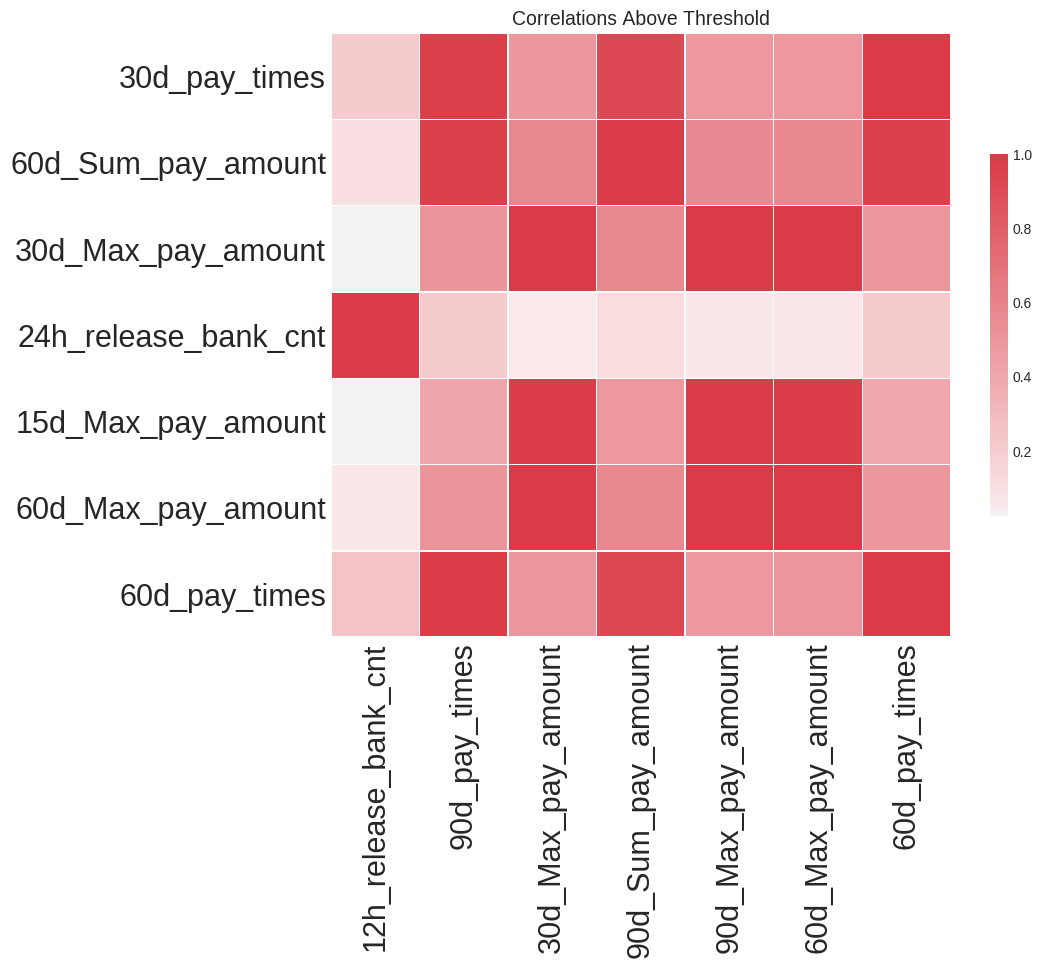

In [13]:
# 绘制选择的特征的相关性heatmap
fs.plot_collinear()

# 绘制所有特征的相关性heatmap

### (3) identify_zero_importance

该方法用于选择对模型预测结果毫无贡献的feature(即zero importance，从数据集中去除或者保留该feature对模型的结果不会有任何影响)

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[85]	valid_0's auc: 0.922964	valid_0's binary_logloss: 0.0469826
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[136]	valid_0's auc: 0.961825	valid_0's binary_logloss: 0.0296949
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[59]	valid_0's auc: 0.951035	valid_0's binary_logloss: 0.0313064
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[108]	valid_0's auc: 0.961459	valid_0's binary_logloss: 0.0303649
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[54]	valid_0's auc: 0.937138	valid_0's binary_logloss: 0.0346139
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[111]	valid_0's auc: 0.932796	valid_0's binary_logl

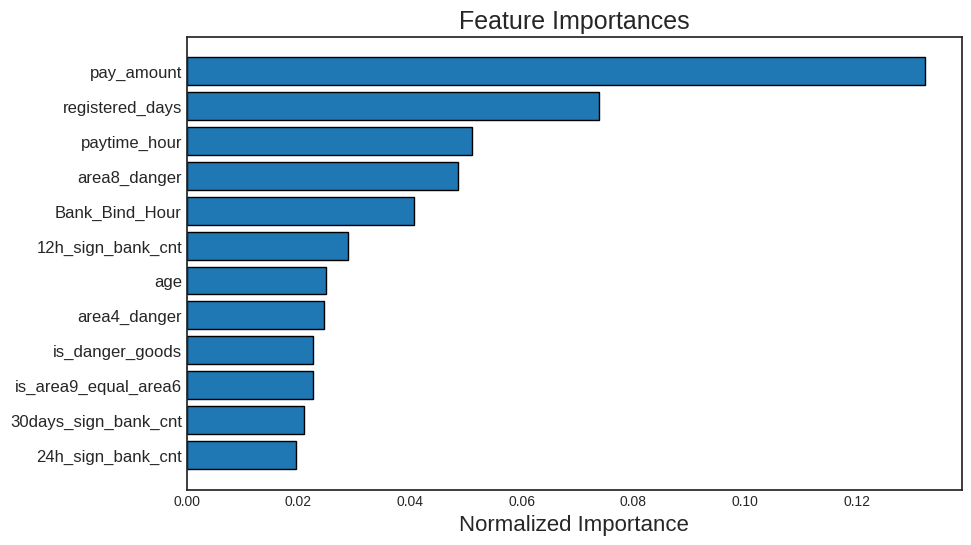

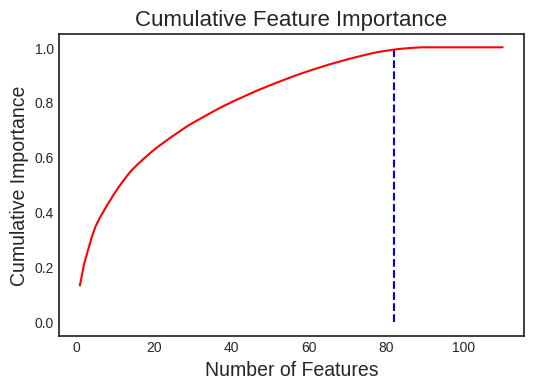

82 features required for 0.99 of cumulative importance


In [15]:
# 选择zero importance的feature,
#
# 参数说明：
#          task: 'classification' / 'regression', 如果数据的模型是分类模型选择'classificaiton',
#                否则选择'regression'
#          eval_metric: 判断提前停止的metric. for example, 'auc' for classification, and 'l2' for regression problem
#          n_iteration: 训练的次数
#          early_stopping: True/False, 是否需要提前停止

fs.identify_zero_importance(task='classification',
                            eval_metric='auc',
                            n_iterations=10,
                            early_stopping=True)
# 查看选择出的zero importance feature
fs.ops['zero_importance']

# 绘制feature importance 关系图
# 参数说明：
#          plot_n: 指定绘制前plot_n个最重要的feature的归一化importance条形图，如图4所示
#          threshold: 指定importance分数累积和的阈值，用于指定图4中的蓝色虚线.
#              蓝色虚线指定了importance累积和达到threshold时，所需要的feature个数。
#              注意：在计算importance累积和之前，对feature列表安装feature importance的大小
#                   进行了降序排序
fs.plot_feature_importances(threshold=0.99, plot_n=12)

### (4) identify_low_importance

该方法是使用identify_zero_importance计算的结果，选择出对importance累积和达到指定阈值没有贡献的feature（这样说有点拗口），即图5中蓝色虚线之后的feature。该方法只适用于监督学习。identify_low_importance有点类似于PCA中留下主要分量去除不重要的分量。

In [16]:
# 选择出对importance累积和达到99%没有贡献的feature
fs.identify_low_importance(cumulative_importance=0.99)

# 查看选择出的feature
fs.ops['low_importance']

81 features required for cumulative importance of 0.99 after one hot encoding.
29 features do not contribute to cumulative importance of 0.99.



['is_area7_equal_area6',
 '12h_release_bank_cnt',
 'is_area7_equal_area3',
 '15d_pay_times',
 'area11_danger_1',
 'is_area10_equal_area8',
 '30m_pay_times',
 'registered_channels_SDK',
 '30d_AcctPerIP',
 'goods_type',
 'is_area9_equal_area5',
 'is_area8_equal_area5',
 'is_area1_equal_area11',
 'ip_desc_danger',
 'area10_danger',
 'is_area2_equal_area5',
 'is_area7_equal_area5',
 'is_area5_equal_area4',
 'is_area5_equal_area6',
 '1d_Max_pay_amount',
 'is_area5_equal_area3',
 'area1_danger',
 '12h_Min_pay_amount',
 '1d_Min_pay_amount',
 '30d_AcctPerDevice',
 'registered_channels_31',
 'registered_channels_APP',
 'is_area1_equal_area2',
 'area6_danger_other']

### (5) identify_single_unique

该方法用于选择只有单个取值的feature，单个值的feature的方差为0，对于模型的训练不会有任何作用（从信息熵的角度看，该feature的熵为0）。该方法可应用于监督学习和非监督学习。

16 features with a single unique value.



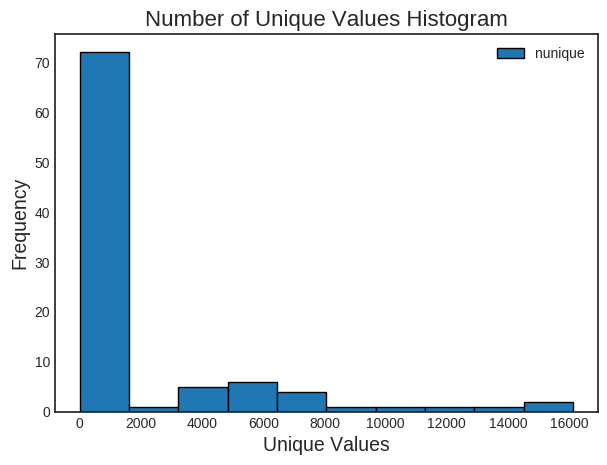

In [17]:
# 选择出只有单个值的feature
fs.identify_single_unique()

# 查看选择出的feature
fs.ops['single_unique']

#绘制所有feature unique value的直方图
fs.plot_unique()

### 从数据集去除选择的特征
上面介绍了feature-selector提供的特征选择方法，这些方法从数据集中识别了feature，但并没有从数据集中将这些feature去除。feature-selector中提供了remove方法将选择的特征从数据集中去除，并返回去除特征之后的数据集。

In [19]:
# 去除所有类型的特征
#    参数说明：
#       methods: 
#               desc:  需要去除哪些类型的特征
#               type:  string / list-like object
#             values:  'all' 或者是 ['missing', 'single_unique', 'collinear', 'zero_importance', 'low_importance']
#                      中多个方法名的组合
#      keep_one_hot: 
#              desc: 是否需要保留one-hot encoding的特征
#              type: boolean
#              values: True/False
#              default: True
train_removed = fs.remove(methods = 'all', keep_one_hot=False)

['missing', 'collinear', 'zero_importance', 'low_importance', 'single_unique'] methods have been run

Removed 67 features including one-hot features.


In [20]:
train_removed.shape

(46978, 46)

In [18]:
# 注意：
# 少了下面任何一个参数都会报错，raise ValueError
fs.identify_all(selection_params =
                {'missing_threshold': 0.6,    
                 'correlation_threshold': 0.98, 
                 'task': 'classification',    
                 'eval_metric': 'auc', 
                 'cumulative_importance': 0.99})

22 features with greater than 0.60 missing values.

16 features with a single unique value.

7 features with a correlation magnitude greater than 0.98.

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[85]	valid_0's auc: 0.947164	valid_0's binary_logloss: 0.0371494
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[282]	valid_0's auc: 0.960841	valid_0's binary_logloss: 0.0289929
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[61]	valid_0's auc: 0.957934	valid_0's binary_logloss: 0.0375144
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[76]	valid_0's auc: 0.959988	valid_0's binary_logloss: 0.0314053
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[175]	valid_0's auc: 0.952407	valid_0's binary_logloss: 0.0290